# Anomaly Detection: PyOD Experiment

## 0. PyOD 패키지 설치
https://pyod.readthedocs.io/en/latest/

In [ ]:
#%pip install pyod 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [2]:
df = pd.read_csv('../dataset/melting_tank.csv', encoding='cp949')
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [4]:
df.shape

(835200, 7)

In [5]:
df.isnull().sum()

STD_DT         0
NUM            0
MELT_TEMP      0
MOTORSPEED     0
MELT_WEIGHT    0
INSP           0
TAG            0
dtype: int64

In [6]:
df['TAG'].value_counts()

TAG
OK    658133
NG    177067
Name: count, dtype: int64

## 2. Datetime 인덱스

In [9]:
df['STD_DT'] = pd.to_datetime(df['STD_DT'], format='%Y-%m-%d %H:%M')
df = df.set_index('STD_DT')
df

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,OK
2020-03-04 00:00:00,1,433,78,609,3.19,OK
2020-03-04 00:00:00,2,464,154,608,3.19,OK
2020-03-04 00:00:00,3,379,212,606,3.19,OK
2020-03-04 00:00:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...
2020-04-30 23:59:00,835195,755,1743,318,3.21,OK
2020-04-30 23:59:00,835196,385,206,317,3.19,OK
2020-04-30 23:59:00,835197,465,148,316,3.20,OK


## 3. EDA 시각화

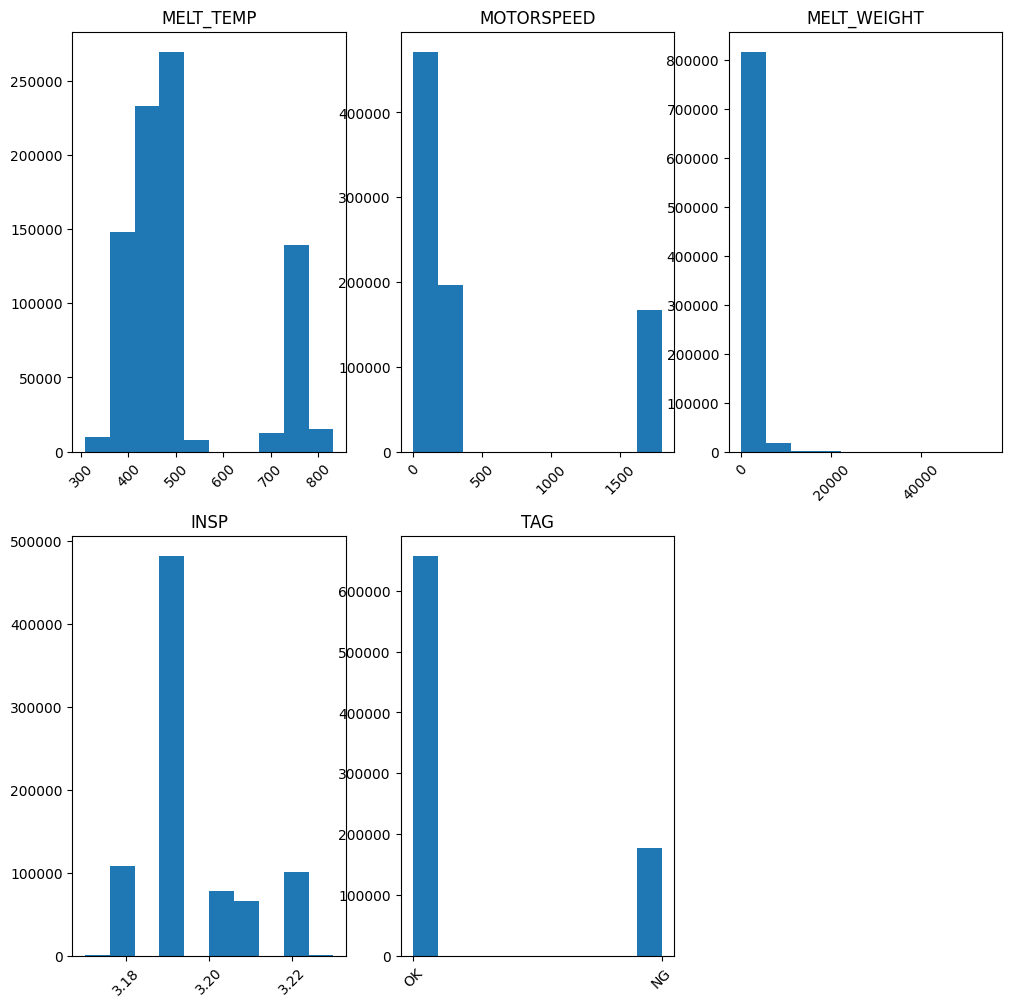

In [10]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

plt.figure(figsize=(12, 12))

for i in range(len(col_name)):
    num = 231+i
    
    plt.subplot(num)
    plt.hist(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])

plt.show()

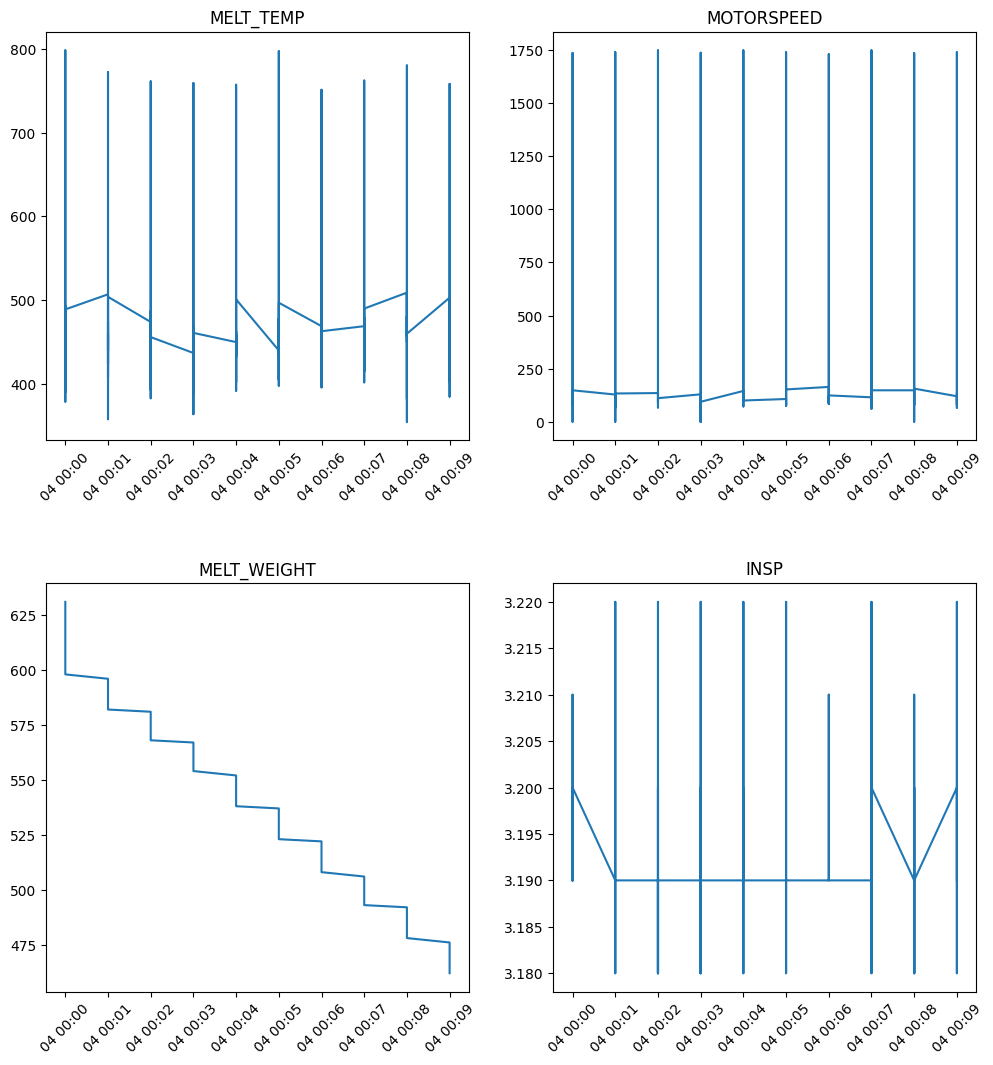

In [11]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']

plt.figure(figsize=(12, 12))

for i in range(len(col_name)):
    num = 221+i
    plt.subplot(num)
    plt.plot(df[col_name[i]][0:100])
    plt.xticks(rotation=45)
    plt.title(col_name[i])

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)  
plt.show()

## 4. 데이터 전처리

In [12]:
df['TAG'] = df['TAG'].map({'OK': 0, 
                           'NG': 1})
df['TAG'].value_counts()

TAG
0    658133
1    177067
Name: count, dtype: int64

In [13]:
corr = df.corr(method = 'pearson') 
corr

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524,-0.086698
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295,-0.310586
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813,-0.264693
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005,0.012084
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000,-0.272580
TAG,-0.086698,-0.310586,-0.264693,0.012084,-0.272580,1.000000


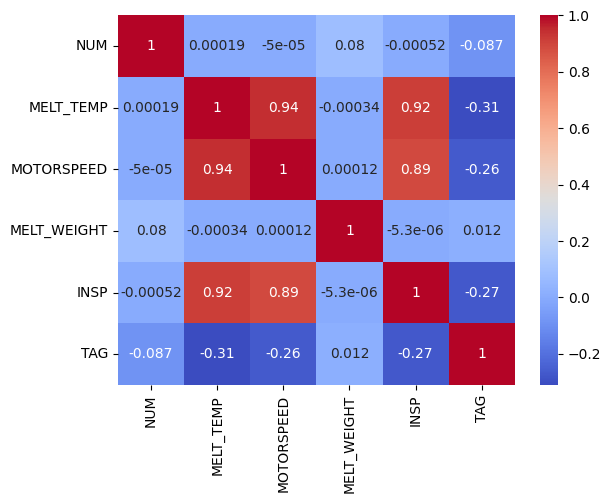

In [14]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [15]:
df.head()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04,0,489,116,631,3.19,0
2020-03-04,1,433,78,609,3.19,0
2020-03-04,2,464,154,608,3.19,0
2020-03-04,3,379,212,606,3.19,0
2020-03-04,4,798,1736,604,3.21,0


In [16]:
X = df.drop(['NUM','TAG'], axis=1)
y = df['TAG']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## 5. PyOD 패키지

+ pyod.models.abod
+ pyod.models.auto_encoder 
+ pyod.models.auto_encoder_torch 
+ pyod.models.cblof 
+ pyod.models.cof 
+ pyod.models.combination 
+ pyod.models.copod
+ pyod.models.deep_svdd 
+ pyod.models.feature_bagging 
+ pyod.models.hbos 
+ pyod.models.iforest 
+ pyod.models.knn 
+ pyod.models.lmdd 
+ pyod.models.loda 
+ pyod.models.lof 
+ pyod.models.loci 
+ pyod.models.lscp 
+ pyod.models.mad 
+ pyod.models.mcd 
+ pyod.models.mo_gaal
+ pyod.models.ocsvm 
+ pyod.models.pca 
+ pyod.models.rod 
+ pyod.models.sod 
+ pyod.models.so_gaal
+ pyod.models.sos 
+ pyod.models.suod 
+ pyod.models.vae 
+ pyod.models.xgbod 

In [20]:
#%pip install combo

In [21]:
import os
import sys
from time import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score

In [22]:
# standardizing data for processing
X_train_norm, X_test_norm = standardizer(X_train, X_test)

classifiers = {
    'Cluster-based Local Outlier Factor': CBLOF(),
    'Histogram-base Outlier Detection (HBOS)': HBOS(),
    'Isolation Forest': IForest(),
    'K Nearest Neighbors (KNN)': KNN(),
    'Local Outlier Factor (LOF)': LOF(),
    'Principal Component Analysis (PCA)': PCA(),
}

time_list = []
th_list = []
roc_list = []
prn_list = []

for clf_name, clf in tqdm(classifiers.items()):
    t0 = time()
    clf.fit(X_train_norm)
    test_scores = clf.decision_function(X_test_norm)
    t1 = time()
    duration = round(t1 - t0, ndigits=4)
    time_list.append(duration)

    roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
    prn = round(precision_n_scores(y_test, test_scores), ndigits=4)
    threshold = round(clf.threshold_) 

    print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
          'execution time: {duration}s'.format(
        clf_name=clf_name, roc=roc, prn=prn, duration=duration))
 
    th_list.append(threshold)
    roc_list.append(roc)
    prn_list.append(prn)

 17%|█▋        | 1/6 [00:02<00:11,  2.27s/it]

Cluster-based Local Outlier Factor ROC:0.4509, precision @ rank n:0.1161, execution time: 2.1334s


 33%|███▎      | 2/6 [00:04<00:09,  2.39s/it]

Histogram-base Outlier Detection (HBOS) ROC:0.436, precision @ rank n:0.016, execution time: 2.3478s


 50%|█████     | 3/6 [00:12<00:14,  4.79s/it]

Isolation Forest ROC:0.435, precision @ rank n:0.0847, execution time: 7.5131s


 67%|██████▋   | 4/6 [01:04<00:46, 23.35s/it]

K Nearest Neighbors (KNN) ROC:0.5043, precision @ rank n:0.2335, execution time: 51.6597s


 83%|████████▎ | 5/6 [01:53<00:32, 32.61s/it]

Local Outlier Factor (LOF) ROC:0.5011, precision @ rank n:0.2182, execution time: 48.8847s


100%|██████████| 6/6 [01:53<00:00, 18.93s/it]

Principal Component Analysis (PCA) ROC:0.4044, precision @ rank n:0.0258, execution time: 0.2269s


In [23]:
df_columns = ['CBLOF', 'HBOS', 'IForest', 'KNN', 'LOF','PCA']

result = pd.DataFrame({'Duration': time_list,
              'Threshold': th_list,
              'ROC_AUC': roc_list,
              'Precision_N': prn_list}, index=df_columns)
result

,Duration,Threshold,ROC_AUC,Precision_N
CBLOF,2.1334,1,0.4509,0.1161
HBOS,2.3478,5,0.4360,0.0160
IForest,7.5131,0,0.4350,0.0847
KNN,51.6597,0,0.5043,0.2335
LOF,48.8847,1,0.5011,0.2182
PCA,0.2269,423,0.4044,0.0258
